# Expected value 
 I’ll toss a coin, and if it comes up heads, you win \\$1. 
 However, if it is tails, you lose \\$2. Calculate the expected value.

In [1]:
from random import choices
import matplotlib.pyplot as plt

In [2]:
#Define a fair-coin toss.
'''
I've used this explicit approach to be sure that you get the same probability for heads and tails, since I couldn't be
be sure that randint(0,1) method will give the same result!
'''
EXPECTED_VALUE = -0.5
population = [0, 1] # 0 means heads, 1 means tails
weights = [0.5, 0.5] # Probabilities of getting heads and tails respectively

In [3]:
#How not to overload your memory:
def fair_coin_toss_simulation():
    while True:
        yield choices(population, weights)[0]

In [4]:
gen = fair_coin_toss_simulation()

In [5]:
#random.seed(42)
def coin_toss_game_simulation(n_games=10**5):
    '''
        You can play with n_games to see if average toss of a coin would get you close to true expected value of this game.
        You can also uncomment the line before this function definition to have reproducible result, but in general
        I wanted to see if by increasing the number of games monotonically would make "average win per round" converge to
        true expected value. I've also made all the variables avaiable just in case you have some ideas to use them.
    '''
    win_total = 0
    losses_total = 0
    
    for i in range(n_games):
        if next(gen) == 0:
            win_total += 1
        else:
            losses_total -= 2
            
    total_amount = win_total + losses_total
    average_win_per_round = total_amount / n_games
    
    return win_total, losses_total, total_amount, average_win_per_round, n_games

In [6]:
coin_toss_game_simulation()

(49995, -100010, -50015, -0.50015, 100000)

In [7]:
y_axis = []
for g in range(1, 10**4, 10):
    y_axis.append(coin_toss_game_simulation(g)[3]) #We append with the average_win_per_round

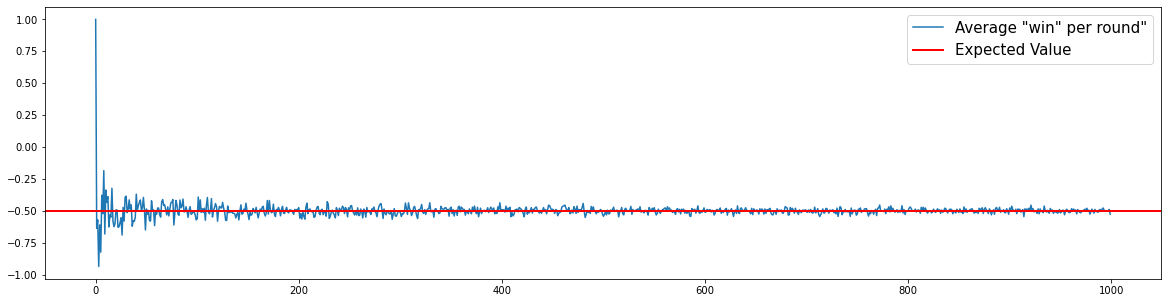

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)

fig, ax = plt.subplots()
ax.plot(y_axis, linewidth=1.5)
plt.axhline(y=EXPECTED_VALUE, color='r', linewidth = 2, linestyle='-')
ax.legend(['Average "win" per round"', 'Expected Value'], fontsize = 15)

plt.plot();

We see that, the more we play this game the average "win" **per game** converges to  -\\$0.5. So, either you know nothing about the game one presents, then you play it n times in real-life, get the total amount of money you've win/lost and divide it by the number of games you played to get the average value of win/loss **per game** (aka **expected value**) OR you trust the maths behind the formula (definition) of expected value to get that number without spending a penny. Or you simply make a simulation like this one!  
You see, the average loss per game in real-life will vary because value of coin-toss is a random process (thats why I also think that the use of random seed is pointless in this case) but the point is that it will always be around the expected value. 

So, the next time you play this game for example 120 times you will probably lose around 120 times -\\$0.5 amount of money.